<a href="https://colab.research.google.com/github/lionelalexandre/4TPU271/blob/main/S2_TD1_python_notebook_en_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:blue"> <center>Teacher / DS : 4TPU271 & 4TPU279U $-$ Licence 1ère année $-$ printemps 2023</center></span>
# <center>Méthodes Numériques pour les Sciences</center>
# <hr style="border:1px solid black"><center>DS1 : Introduction à la programmation Python </center><hr style="border:1px solid black">
</br>

<span style="color:red"> A la fin de l'épreuve, déposer ce fichier **notebook** complété ou un fichier **python** édité via Spyder, sur la page
[Moodle](https://moodle1.u-bordeaux.fr/course/view.php?id=12271) consacrée à votre demi-groupe. </span>


<span style="color:red"> Renommer votre fichier suivant le protocole  </span>: 
- `DST_NomPrenom_S2.ipynb` pour un fichier *jupyter-notebook*

ou 

- `DST_NomPrenom_S2.py` pour un fichier *python* pur

<div class="alert alert-block alert-warning">
<b>ATTENTION :</b> Abolir totalement l’emploi des espaces, lettres accentuées et autres symboles
dans le nom du fichier !
</div>

**Les points suivants seront pris en compte pour l'évaluation :**
- respect des consignes
- mise en forme des figures (légendes, unités, titre etc...)
- clarté des programmes et mise en page

</br>
<div style="text-align: right"> Credits: R. Boisgard, L. Truflandier, Philippe Paillou, Julien Burgin, Sara Zein, Leo Delmarre, Simon Villain-Guillot, Louise Marinho </div>


## <hr style="border:1px solid black"> Exercice 1 : potentiel de Morse et représentation graphique <hr style="border:1px solid black">

On souhaite étudier le potentiel de Morse de la molécule de Cl$_2$ décrivant la variation d'énergie potentielle en fonction de la distance $x$ entre les 2 atomes de Chlore. Son expression est donnée par :

$$ V(x) = D_e \left( 1 - e^{-\beta (x-x_{e})}\right)^2 - D_e$$

On remarquera :
- $\lim_{x\rightarrow\infty}V(x) = 0 $.
- $\frac {d V(x)}{dx} = 0$ pour $x = x_e$ ; $x_e$ correspond à la distance d'équilibre des 2 atomes.
- $V(x_e)=-D_e$ ; l'énergie potentielle est minimale en $x = x_e$ et vaut moins l'énergie de dissociation $D_e$.

Pour Cl$_2$ on donne : $D_e = 2.514$ eV, $x_e=2.0$ Å et $\beta=2.0$ Å$^{-1}$.

1. Représenter graphiquement le potentiel de Morse. Respecter les consignes suivantes pour le tracé :
    - En utilisant la fonction `linspace`, représenter $V$ en fonction de $x$ pour $x\in[1.4,5.0]$ avec 256 point de discrétisation.
    - Légender les axes avec les unités.
    - Faire apparaître un axe horizontal en pointillé noir correspondant au zéro d'énergie potentielle.
    - Localiser $x_e$ par un cercle noir sur la courbe.
    - Le domaine du tracé sera borné : suivant l'axe des absisses de 1.4 à 5.0, et de -2.7 à 2.7
    suivant l'axe des ordonnées. Utiliser les fonctions `xlim` et `ylim` comme proposé ci-dessous.

In [20]:
import matplotlib.pyplot as plt

# Limites suivant x pour le tracé 
#plt.xlim( 1.4,5.0)

# Limites suivant y pour le tracé 
#plt.ylim(-2.7,2.7)

<span style="color:red">**solution :**</span>

In [21]:
from numpy import exp, linspace
from scipy.constants import e, Avogadro

# Rq: l'utilisation d'une fonction pour le potentiel de Morse n'est pas obligatoire
def pot_morse(x,De,beta,xe):
    return De*(1 - exp(-beta*(x-xe)))**2 - De

De   = 2.514 # eV
beta = 2.00  # Ang^-1
xe   = 2.00  # Ang

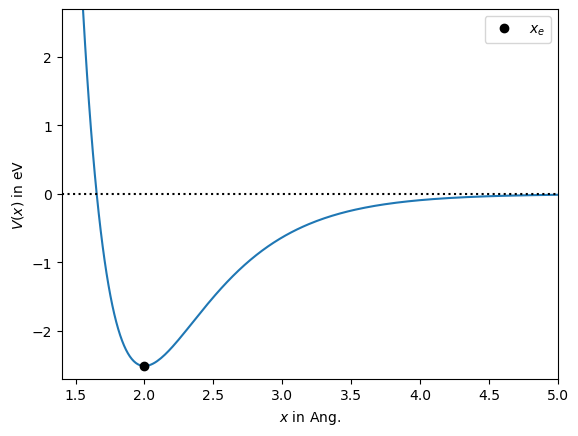

In [22]:
import matplotlib.pyplot as plt

x = linspace(1.4,5,256)

# Tracé du Potentiel de Morse 
V = pot_morse(x,De,beta,xe)
plt.plot(x,V)

# Tracé de l'asymptote horizontale
De_plot = linspace(0,0,256)
plt.plot(x,De_plot,color='black',linestyle=':')

# Localisation de la distance d'équilibre
plt.plot(xe,-De,marker='o',linestyle='',color='black',label='$x_e$')

plt.xlabel('$x$ in Ang.')
plt.ylabel('$V(x)$ in eV')

plt.xlim( 1.4,5.0)
plt.ylim(-2.7,2.7)
plt.legend()

Pour des faibles variations de $x$ au voisinage de $x_e$, on peut assimiler le potentiel de Morse comme
l'énergie potentielle d'un oscillateur harmonique. Le développement au deuxième ordre de Taylor de $V(x)$ au voisinage the $x_e$ permet d'approximer $V(x)$ par :

$$ V_\text{harm}(x) = \beta^2 D_e(x-x_e)^2 -D_e$$

2. Reprendre le graphique précédent et ajouter le potentiel harmonique $V_\text{harm}(x)$. Faire afficher la légende de chaque graphique. Ne pas oublier de borner la représentation comme dans la question précédente. Légender les courbes.

<span style="color:red">**solution :**</span>

In [ ]:
import matplotlib.pyplot as plt

x = linspace(1.4,5,256)
V = pot_morse(x,De,beta,xe)

plt.plot(x,V,label='$V$')
plt.xlabel('$x$ in Ang.')
plt.ylabel('$V(x)$ in eV')

V_harm = beta**2*De*(x - xe)**2 -De
plt.plot(x,V_harm,label='$V_\mathrm{harm}$')

De_plot = linspace(0,0,256)
plt.plot(x,De_plot,color='black',linestyle=':')
plt.plot(xe,-De,marker='o',linestyle='',color='black',label='$x_e$')

plt.xlim(1.4,5.0)
plt.ylim(-2.7,2.7)
plt.legend()


3. Représenter l'écart $V(x) - V_\text{harm}(x)$ sur un nouveau graphique pour $x\in[1.95,2.05]$. Légender les axes.

<span style="color:red">**solution :**</span>

In [ ]:
import matplotlib.pyplot as plt

x = linspace(1.95,2.05,256)
V = pot_morse(x,De,beta,xe)
V_harm = beta**2*De*(x - xe)**2 - De

plt.plot(x,V-V_harm)
plt.xlabel('$x$ in Ang.')
plt.ylabel('$V(x)-V_\mathrm{harm}(x)$ in eV')

<hr style="border:1px solid grey">

## <hr style="border:1px solid black"> Exercice 2 : résolution numérique des équations de la dynamique <hr style="border:1px solid black">

> On souhaite étudier le mouvement d'un des atomes de chlore soumis à la force dérivant du potentiel harmonique $V_\text{harm}(x)$ tel que : $$\vec{f}=-\frac{dV_\text{harm}}{dx}\:\vec{e}_x=-k(x-x_e)\:\vec{e}_x \quad\quad\text{(1)}$$
avec $k=2\beta^2D_e$ la constante de force de la liaison Cl$-$Cl. Pour l'intégration numérique des équations du mouvement, on utilisera la méthode de Hooke-Newton décrite ci-dessous :
$$\begin{align}
x(t_{i+1}) &= x(t_i) + h\;v(t_i) \quad\quad\quad\quad\ \ \text{(2)}\\   
v(t_{i+1}) &= v(t_i)+\frac{h}m f\left(x(t_{i+1})\right)\quad\quad\text{(3)} \\ 
\end{align}$$
avec $m=35.5$ g/mol, la masse de l'atome Cl et $h$ le pas de temps en unité de temps réduite (utr ; 1 utr $\simeq 10^{-14}$ s)

1. A partir des constantes $\beta$ et $D_e$ données précédemment, calculer la valeur $k$ en eV$\cdot$Å$^{-2}$ et N$\cdot$m$^{-1}$.
Pour les conversions, on utilisera les constantes physiques de la librarie `scipy.constants`. Par la suite on prendra $k=20.112$ eV$\cdot$Å$^{-2}$.

<span style="color:red">**solution :**</span>

In [26]:
from scipy.constants import e

De   = 2.514     # eV
beta = 2.00      # Ang^-1

k = 2*beta**2*De
print(' k = %.3f eV.Ang^-2'%k)

k = 2*beta**2*De * e * (1e+10)**2
print(' k = %.1f N.m^-1'%k)

k = 2*beta**2*De

 k = 20.112 eV.Ang^-2
 k = 322.2 N.m^-1


2. Utiliser l'algorithme de Hooke-Newton pour simuler le déplacement de l'atome de Cl autour de sa position d'équilibre. Le temps d'étude sera de $t_\textrm{max}=4\pi\sqrt{m/k}=16.695$ utr, avec un pas de discrétisation $h=0.01$. On utilisera les conditions initiales :
- $x(t_0)=2.02$ Å 
- $v(t_0)=0.0$

On prendra une masse $m=35.5$ g/mol.

***Pour vous guider reprendre les différentes étapes du TD4 données ci-dessous :***

> On commence par définir la force, cf. **équation (1)**, *via* une fonction `f`:

In [27]:
def f(x):
    xe = 2.0
    k  = 2*beta**2*De
    return - k*(x - xe)

> On initialise $m$ et on discrétise l'axe du temps :

In [28]:
from numpy import pi, arange, zeros, cos, sqrt

m = 35.5

tmin = 0.0
tmax = 2*pi*sqrt(m/k)*2
print('tmax = ', tmax)

h    = 0.01
t    = arange(tmin,tmax,h)

tmax =  16.695383920804716


> On initialise les tableaux pour $x$ et $v$ ainsi que les conditions initiales :

In [29]:
x = zeros(len(t))
v = zeros(len(t))

x0 = 2.02
v0 = 0.00

> On applique la relation de récurrence de Hooke-Newton à $x$ et à $v$ :

In [30]:
x[0] = x0
v[0] = v0
for i in range(len(t)-1):
    x[i+1] = x[i] + h*v[i]
    v[i+1] = v[i] + h*f(x[i+1])/m

> Sauvegarder la position $x$ et la vitesse $v$ dans 2 tableaux `x_harm` et `v_harm` pour une utilisation ultérieure

In [31]:
x_harm = x
v_harm = v

> Tracer des lois horaires $x(t)$ et $v(t)$ sur 2 figures différentes

Text(0, 0.5, '$x(t)$ (in Ang)')

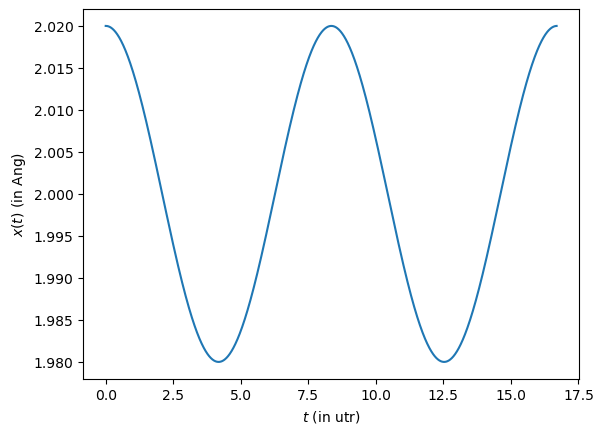

In [32]:
import matplotlib.pylab as plt

plt.plot(t,x,marker='')
plt.xlabel('$t$ (in utr)')
plt.ylabel('$x(t)$ (in Ang)')

Text(0, 0.5, '$v(t)$ (in Ang)')

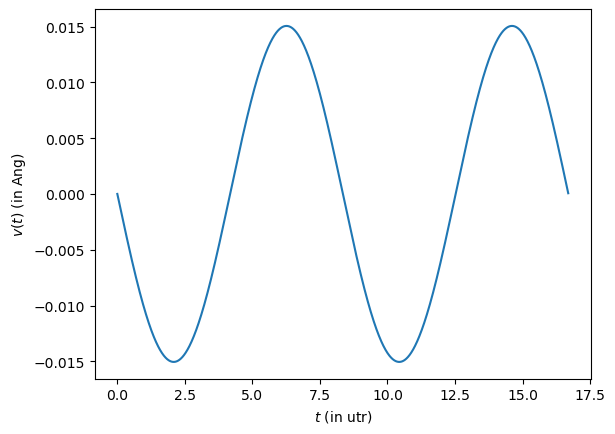

In [33]:
plt.plot(t,v,marker='')
plt.xlabel('$t$ (in utr)')
plt.ylabel('$v(t)$ (in Ang)')

> Tracer du portrait de phase $(x(t),v(t))$ et repérage des conditions initiales :

Text(0, 0.5, '$v(t)$')

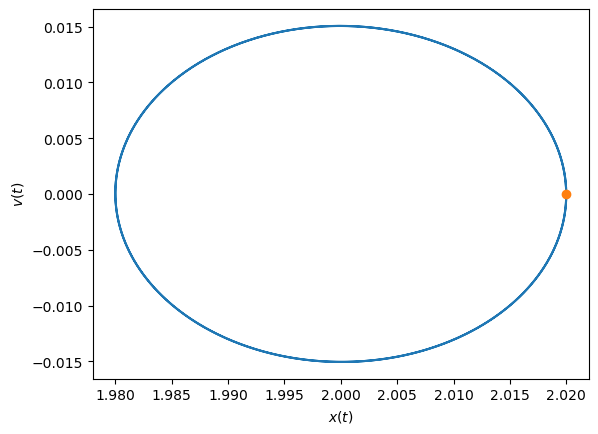

In [34]:
plt.plot(x,v,marker='')
plt.plot(x0,v0,marker='o')
plt.xlabel('$x(t)$')
plt.ylabel('$v(t)$')

3. Reprendre la résolution des équations de la dynamique pour une force dérivant du potentiel de Morse. L'expression est donnée ci-dessous :
$$\vec{f}=-\frac{dV}{dx}\:\vec{e}_x=-2\beta D_e\left( e^{-\beta (x-x_e)} - e^{-2\beta (x-xe)} \right) \:\vec{e}_x \quad\quad\text{(4)}$$

> On commence par définir la force, cf. **équation (4)**, *via* une fonction `f`:

In [35]:
from numpy import exp

def f(x):
    xe   =  2.0
    beta =  2.0
    De   = 2.514 
    return - 2*beta*De*( exp(-beta*(x-xe)) - exp(-2*beta*(x-xe)) ) 


> On initialise $m$ et on discrétise l'axe du temps :

In [36]:
from numpy import pi, arange, zeros, cos, sqrt

m = 35.5

tmin = 0.0
tmax = 2*pi*sqrt(m/k)*2
print('tmax = ', tmax)

h    = 0.01
t    = arange(tmin,tmax,h)

tmax =  16.695383920804716


> On initialise les tableaux pour $x$ et $v$ ainsi que les conditions initiales :

In [42]:
x = zeros(len(t))
v = zeros(len(t))

x0 = 2.02
v0 = 0.0

> On applique la relation de récurrence de Hooke-Newton à $x$ et à $v$ :

In [43]:
x[0] = x0
v[0] = v0
for i in range(len(t)-1):
    x[i+1] = x[i] + h*v[i]
    v[i+1] = v[i] + h*f(x[i+1])/m

> Sauvegarder la position $x$ et la vitesse $v$ dans 2 tableaux `x_morse` et `v_morse`.

In [44]:
x_morse = x
v_morse = v

> Sur un même graphique tracer des lois horaires $v_\text{harm}(t)$ et $v_\text{morse}(t)$ ; sur un autre graphique tracer $x_\text{harm}(t)$ et $x_\text{morse}(t)$.

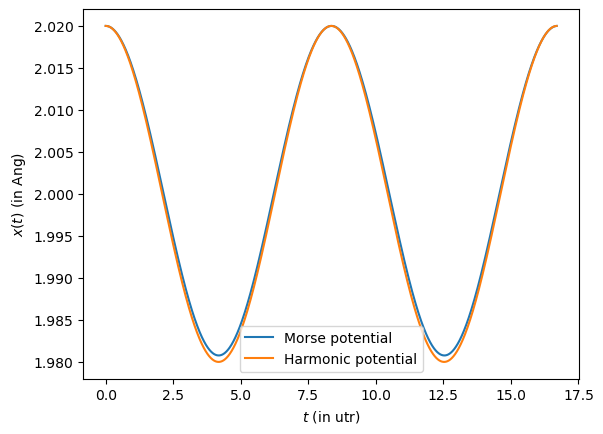

In [45]:
import matplotlib.pylab as plt

plt.plot(t,x_morse,marker='',label='Morse potential')
plt.plot(t,x_harm,marker='', label='Harmonic potential')

plt.xlabel('$t$ (in utr)')
plt.ylabel('$x(t)$ (in Ang)')
plt.legend()

Text(0, 0.5, '$v(t)$ (in Ang)')

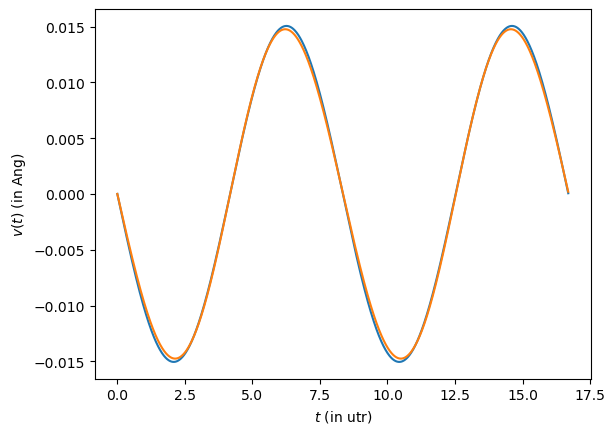

In [46]:
plt.plot(t,v_harm,marker='', label='Harmonic potential')
plt.plot(t,v_morse,marker='',label='Morse potential')

plt.xlabel('$t$ (in utr)')
plt.ylabel('$v(t)$ (in Ang)')

> Tracer des portraits de phase $(x_\text{morse}(t)v_\text{morse}(t))$ et $(x_\text{harm}(t)v_\text{harm}(t))$ et repérer des conditions initiales :

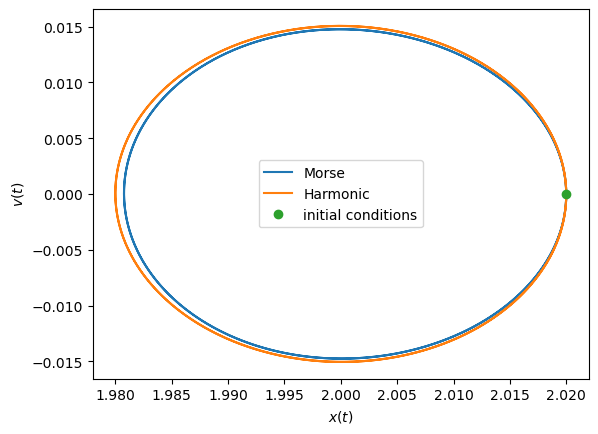

In [47]:
plt.plot(x_morse,v_morse,marker='',label='Morse')
plt.plot(x_harm,v_harm,  marker='',label='Harmonic')

plt.plot(x0,v0,marker='o',linestyle='',label='initial conditions')
plt.xlabel('$x(t)$')
plt.ylabel('$v(t)$')
plt.legend()

4. Reprendre les questions 2. et 3. avec les conditions initiales :
- $x(t_0)=2.2$ Å 
- $v(t_0)=0$ Å/utr

## <hr style="border:1px solid black"> Exercice bonus : double factoriel (pair) <hr style="border:1px solid black">

Pour un entier $n$ **pair**, le double factoriel, $n!!$, est donné par :

$$\sum^{\frac{n}{2}}_{k=1}(2k)=2\times4\times\cdots(n-4)(n-2)n$$

Ecrire un programme permettant le calcul de $n!!$. Tester votre programme avec $n=12$ et comparer au résultat
obtenu avec la fonction `factorial2()` de la librairie `scipy`.

<span style="color:red">**solution :**</span>

In [24]:
from scipy.special import factorial2

n = 20

fact2 = 1
for k in range(1,int(n/2)+1):
    fact2 = fact2*2*k

print(fact2)
print(factorial2(n))

3715891200
3715891200.0
